In [1]:
# common imports
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
print("sklearn version", sklearn.__version__)

sklearn version 0.18.1


### Question 1

train and fine-tune a Decision Tree for the moons dataset.

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
print(X.shape, y.shape)

(10000, 2) (10000,)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [5]:
pred_train_y = tree_clf.predict(train_X)
pred_test_y = tree_clf.predict(test_X)

In [6]:
print("Accuracy of Train", accuracy_score(pred_train_y, train_y))
print("Accuracy of Test", accuracy_score(pred_test_y, test_y))

Accuracy of Train 1.0
Accuracy of Test 0.816333333333


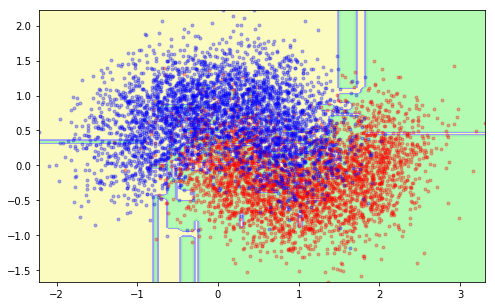

In [11]:
from matplotlib.colors import ListedColormap
# visualize decision boundary
def plot_decision_boundary(clf, X, y):
    axes = [np.min(X[:,0]), np.max(X[:,0]), np.min(X[:,1]), np.max(X[:,1])]
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    xx1, xx2 = np.meshgrid(x1s, x2s)
    new_X = np.c_[xx1.ravel(), xx2.ravel()]
    pred = clf.predict(new_X).reshape(xx1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.plot(X[:,0][y==1], X[:,1][y==1], "r.", alpha=0.3)
    plt.plot(X[:,0][y==0], X[:,1][y==0], "b.", alpha=0.3)
    plt.contourf(xx1, xx2, pred, cmap=custom_cmap, alpha=0.8, linewidth=10)
    plt.axis(axes)

fig = plt.figure(figsize=(8,5))
plot_decision_boundary(tree_clf, train_X, train_y)
plt.show()

In [13]:
# decrease the max_depth
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [14]:
pred_train_y = tree_clf.predict(train_X)
pred_test_y = tree_clf.predict(test_X)

In [15]:
print("Accuracy of Train", accuracy_score(pred_train_y, train_y))
print("Accuracy of Test", accuracy_score(pred_test_y, test_y))

Accuracy of Train 0.855571428571
Accuracy of Test 0.865333333333


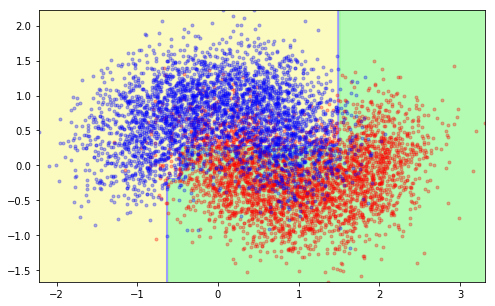

In [16]:
fig = plt.figure(figsize=(8,5))
plot_decision_boundary(tree_clf, train_X, train_y)
plt.show()

### Question 2

Grow a forest

In [28]:
from sklearn.model_selection import ShuffleSplit

# generate 1000 subsets, each containing 100 instances
splits = ShuffleSplit(n_splits=1000, test_size = len(train_X)-100, random_state=42)

In [31]:
accuracy = []
prediction = []
for train_idx, test_idx in splits.split(train_X):
    clf = DecisionTreeClassifier()
    clf.fit(train_X[train_idx], train_y[train_idx])
    pred_y = clf.predict(test_X)
    prediction.append(pred_y)
    accuracy.append(accuracy_score(pred_y, test_y))

In [32]:
np.mean(accuracy)

0.78974466666666665

In [34]:
prediction_df = pd.DataFrame(prediction)

In [50]:
pred_y = prediction_df.mode() # take the majority vote predictions

In [62]:
accuracy_score(pred_y.iloc[0].values, test_y)

0.86799999999999999